In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv (r"C:\Users\28271\Desktop\Sales Data.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\28271\Desktop\Sales Data.csv")

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Order ID             0
Customer ID          0
Product ID           0
Product Category     0
Quantity Sold        0
Price per Unit       0
Order Date           0
Customer Location    0
Payment Method       0
dtype: int64
0


In [14]:
df['Total Sales'] = df['Quantity Sold'] * df['Price per Unit']
    

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


In [16]:
average_order_value = df.groupby('Customer ID')['Total Sales'].mean()


In [17]:
purchase_frequency = df['Customer ID'].value_counts()


In [18]:
top_products = df.groupby('Product ID')['Total Sales'].sum().nlargest(5)


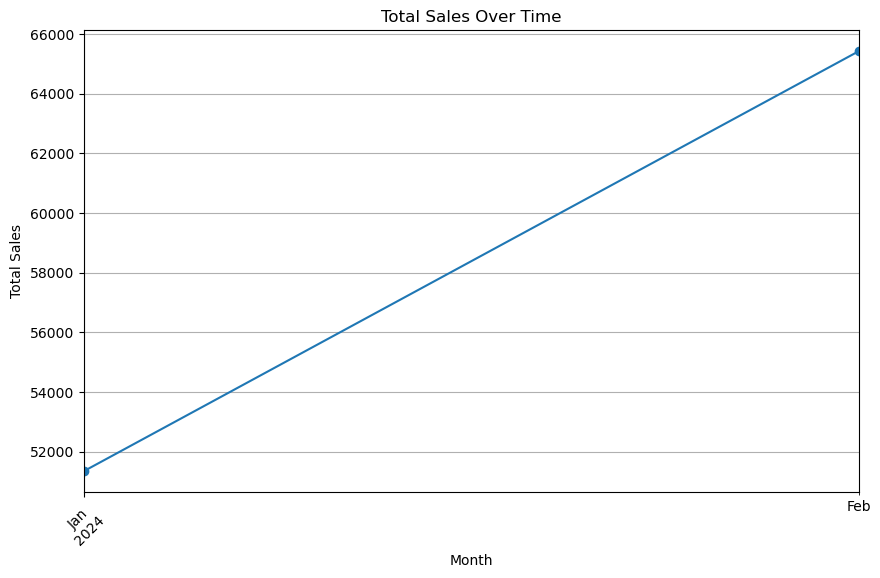

Sales peaked in 2024-02 with a total of $65426.44.


In [19]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Total Sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Insight
peak_month = monthly_sales.idxmax()
print(f"Sales peaked in {peak_month} with a total of ${monthly_sales.max():.2f}.")


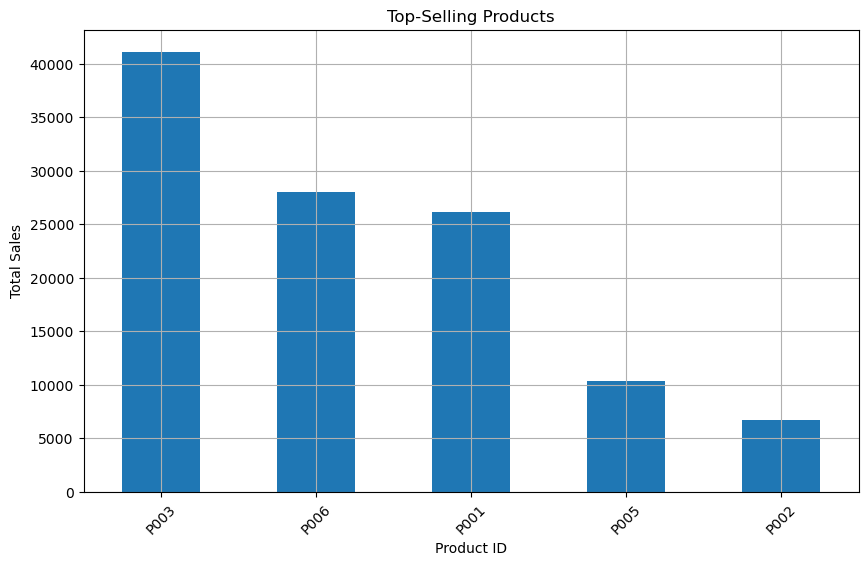

Top-selling products:
Product ID
P003    41098.63
P006    27999.30
P001    26198.69
P005    10349.31
P002     6748.65
Name: Total Sales, dtype: float64


In [20]:
top_products = df.groupby('Product ID')['Total Sales'].sum().nlargest(5)

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Insight
print("Top-selling products:")
print(top_products)


In [21]:
average_order_value = df.groupby('Customer ID')['Total Sales'].mean()
purchase_frequency = df['Customer ID'].value_counts()

# Insight
print(f"Average order value per customer: ${average_order_value.mean():.2f}")
print(f"Most frequent customer ID: {purchase_frequency.idxmax()} with {purchase_frequency.max()} purchases.")


Average order value per customer: $1158.94
Most frequent customer ID: C001 with 27 purchases.


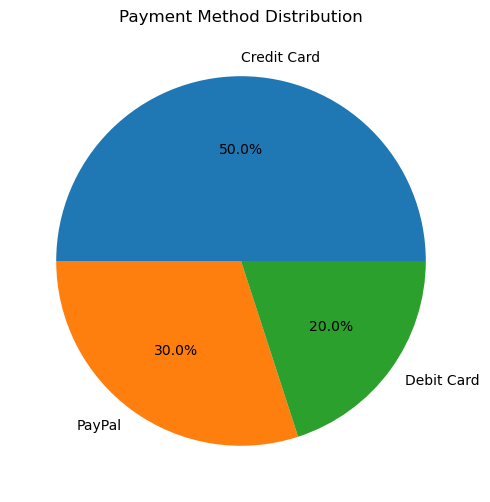

Payment method distribution:
Payment Method
Credit Card    50
PayPal         30
Debit Card     20
Name: count, dtype: int64


In [22]:
payment_distribution = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
payment_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

# Insight
print("Payment method distribution:")
print(payment_distribution)


In [23]:
print("\n--- Insights and Findings ---")
print(f"1. Sales peaked in {peak_month} with a total of ${monthly_sales.max():.2f}.")
print("2. Top-selling products:")
print(top_products)
print(f"3. Average order value per customer: ${average_order_value.mean():.2f}.")
print(f"4. Most frequent customer ID: {purchase_frequency.idxmax()} with {purchase_frequency.max()} purchases.")
print("5. Payment method distribution:")
print(payment_distribution)



--- Insights and Findings ---
1. Sales peaked in 2024-02 with a total of $65426.44.
2. Top-selling products:
Product ID
P003    41098.63
P006    27999.30
P001    26198.69
P005    10349.31
P002     6748.65
Name: Total Sales, dtype: float64
3. Average order value per customer: $1158.94.
4. Most frequent customer ID: C001 with 27 purchases.
5. Payment method distribution:
Payment Method
Credit Card    50
PayPal         30
Debit Card     20
Name: count, dtype: int64
